In [48]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

url = 'clean_airbnb_df_mexico.csv'
df = pd.read_csv(url)

In [49]:
final_df = df

In [50]:
final_df

,Unnamed: 0,neighbourhood_Azcapotzalco,neighbourhood_Benito Juárez,neighbourhood_Coyoacán,neighbourhood_Cuajimalpa de Morelos,neighbourhood_Cuauhtémoc,neighbourhood_Gustavo A. Madero,neighbourhood_Iztacalco,neighbourhood_Iztapalapa,neighbourhood_Miguel Hidalgo,...,neighbourhood_Venustiano Carranza,neighbourhood_Xochimilco,neighbourhood_Álvaro Obregón,latitude,longitude,accommodates,bathrooms,price,availability_365,number_of_reviews
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,19.411620,-99.177940,14,4.0,6430,365,64
1,2,0,0,0,0,1,0,0,0,0,...,0,0,0,19.429101,-99.160763,2,1.5,3350,89,221
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,19.483210,-99.112410,2,1.0,339,86,6
3,4,0,0,0,0,1,0,0,0,0,...,0,0,0,19.432210,-99.157080,2,1.5,1273,329,22
4,5,0,0,0,0,0,0,0,0,1,...,0,0,0,19.428330,-99.176340,2,2.0,1002,115,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25072,25695,0,1,0,0,0,0,0,0,0,...,0,0,0,19.381450,-99.148560,2,1.0,970,265,0
25073,25696,0,0,0,0,1,0,0,0,0,...,0,0,0,19.413522,-99.175167,2,1.0,175,262,0
25074,25697,0,0,0,0,1,0,0,0,0,...,0,0,0,19.411594,-99.167618,5,2.0,1166,266,0
25075,25698,0,0,0,0,1,0,0,0,0,...,0,0,0,19.403856,-99.164122,2,1.0,286,267,0


In [51]:
final_df = final_df.drop(['Unnamed: 0'], axis=1)

# X-y Splitt

In [52]:
X = final_df.drop(columns=['price'])
y = final_df[['price']]

## Train test split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42)

### Standardize the data (after the data split!)

#### MinMaxScaler

In [54]:
# MinMaxScaler X_train
scaler1 = MinMaxScaler()
X_train = scaler1.fit_transform(X_train)

In [55]:
# MinMaxScaler X_test
X_test = scaler1.transform(X_test)

In [56]:
#MinMaxScaler y_train
scaler2 = MinMaxScaler()
y_train = scaler2.fit_transform(y_train)

In [57]:
#MinMaxScaler y_test
y_test = scaler2.transform(y_test)

#### PowerTransform

In [58]:
#PowerTransform X_train
# pt1 = PowerTransformer()
# X_train = pt1.fit_transform(X_train)

In [59]:
#PowerTransform X_test
# X_test = pt1.transform(X_test)

In [60]:
#PowerTransform y_train
# pt2 = PowerTransformer()
# y_train = pt2.fit_transform(y_train)

In [61]:
#PowerTransform y_test
# y_test = pt2.transform(y_test)

#### StandardScaler

In [62]:
# StandardScaler X_train
# scaler1 = StandardScaler()
# X_train = scaler1.fit_transform(X_train)

In [63]:
# StandardScaler X_test
# X_test = scaler1.transform(X_test)

In [64]:
# StandardScaler y_train
# scaler2 = StandardScaler()
# y_train = scaler2.fit_transform(y_train)

In [65]:
# StandardScaler y_test
# y_test = scaler2.transform(y_test)

### Apply linear regression

In [66]:
ln = LinearRegression()
model = ln.fit(X_train, y_train)

In [67]:
model.coef_

array([[ 0.09450049,  0.06792675,  0.05210393,  0.021259  ,  0.162384  ,
         0.14007668,  0.1033783 ,  0.07309277,  0.15809749, -0.08862895,
        -0.03035456,  0.05060753,  0.10952429, -0.04081338,  0.02388964,
        -0.39744726, -0.26318292,  0.48951751,  0.23549455,  0.02127703,
        -0.07042588]])

In [68]:
model.intercept_

array([0.30729843])

### Create predictions for the test set

In [69]:
y_pred = model.predict(X_test)

In [70]:
y_test

array([[0.23656764],
       [0.29819848],
       [0.52054362],
       ...,
       [0.08659924],
       [0.1897914 ],
       [0.17778129]])

In [71]:
# # inverse transforming predictions
# y_pred = scaler2.inverse_transform(y_pred)
# y_test = scaler2.inverse_transform(y_test)

In [72]:
y_pred = pd.DataFrame(y_pred)

In [73]:
y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop=True)

In [74]:
y_test = y_test.rename(columns={0: 'y_test'})

In [75]:
y_test

,y_test
0,0.236568
1,0.298198
2,0.520544
3,0.181416
4,0.044090
...,...
6265,0.054994
6266,0.080120
6267,0.086599
6268,0.189791


In [76]:
residuals_df = pd.concat([y_test,y_pred], axis=1)

In [77]:
residuals_df = residuals_df.rename(columns={0: 'y_pred'})

In [78]:
residuals_df['residual'] = residuals_df['y_test'] - residuals_df['y_pred']

In [79]:
# residuals_df.to_csv("residuals_df_df_mexico.csv")

In [80]:
residuals_df = residuals_df.sort_values(by='y_pred', ascending=True)

In [81]:
residuals_df 

,y_test,y_pred,residual
5447,0.047092,-0.107083,0.154175
1695,0.043932,-0.098788,0.142720
3391,0.018963,-0.096119,0.115082
6064,0.044090,-0.095165,0.139255
5563,0.037295,-0.093932,0.131227
...,...,...,...
5006,1.000000,0.812401,0.187599
4781,1.000000,0.812595,0.187405
98,1.000000,0.816348,0.183652
579,1.000000,0.816578,0.183422


In [82]:
residuals_df.to_csv("residuals_df_mexico.csv")

### Calculating metrics

In [83]:
mean_error = residuals_df['residual'].mean()
mean_error

-0.002735679755828758

- The negative sign of the Mean Error suggests that, on average, the model's predictions are slightly lower than the actual values. This indicates a slight bias in the model's predictions, where it tends to underestimate the dependent variable.
- The magnitude of the Mean Error, which is very close to zero (-0.0095 when rounded), implies that the average bias across all predictions is very small. This means that, despite the bias towards underestimation, the model is relatively accurate on average across the dataset.

In [84]:
mse = mean_squared_error(y_test, y_pred)
mse

0.022754243802589193

- MSE measures the average of the squares of the errors, that is, the average squared difference between the estimated values and the actual value. MSE is a measure of the quality of an estimator—it is always non-negative, and values closer to zero are better

In [85]:
rmse = rmse = sqrt(mse)
rmse

0.15084509870257368

In [86]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.09722141659730223

### Computing R2_score for test_set

In [87]:
r2_test = round(r2_score(y_test, y_pred), 3)
r2_test

0.41

### Computing R2_score for train_set

In [88]:
y_pred_train = pd.DataFrame(model.predict(X_train))
r2_train = round(r2_score(y_train, y_pred_train), 2)
r2_train

0.4

### Calculating adjusted R^2

In [89]:
# Calculating adjusted R^2
n = X_train.shape[0]  # Number of observations in the training set
p = X_train.shape[1]  # Number of features used for training
adjusted_r2 = 1 - (1 - r2_test) * (n - 1) / (n - p - 1)
print(f'Adjusted R2: {adjusted_r2} \n')

Adjusted R2: 0.40934043119510244 



### Plot

In [90]:
features_names = list(X)

In [91]:
coefficients = model.coef_
coefficients = [i for i in coefficients[0]]

In [92]:
fi_dict = {'name':features_names, 'coeff':coefficients}
fi_df = pd.DataFrame(fi_dict)

In [93]:
fi_df = fi_df.sort_values(by='coeff', ascending=False)

<Axes: xlabel='coeff', ylabel='name'>

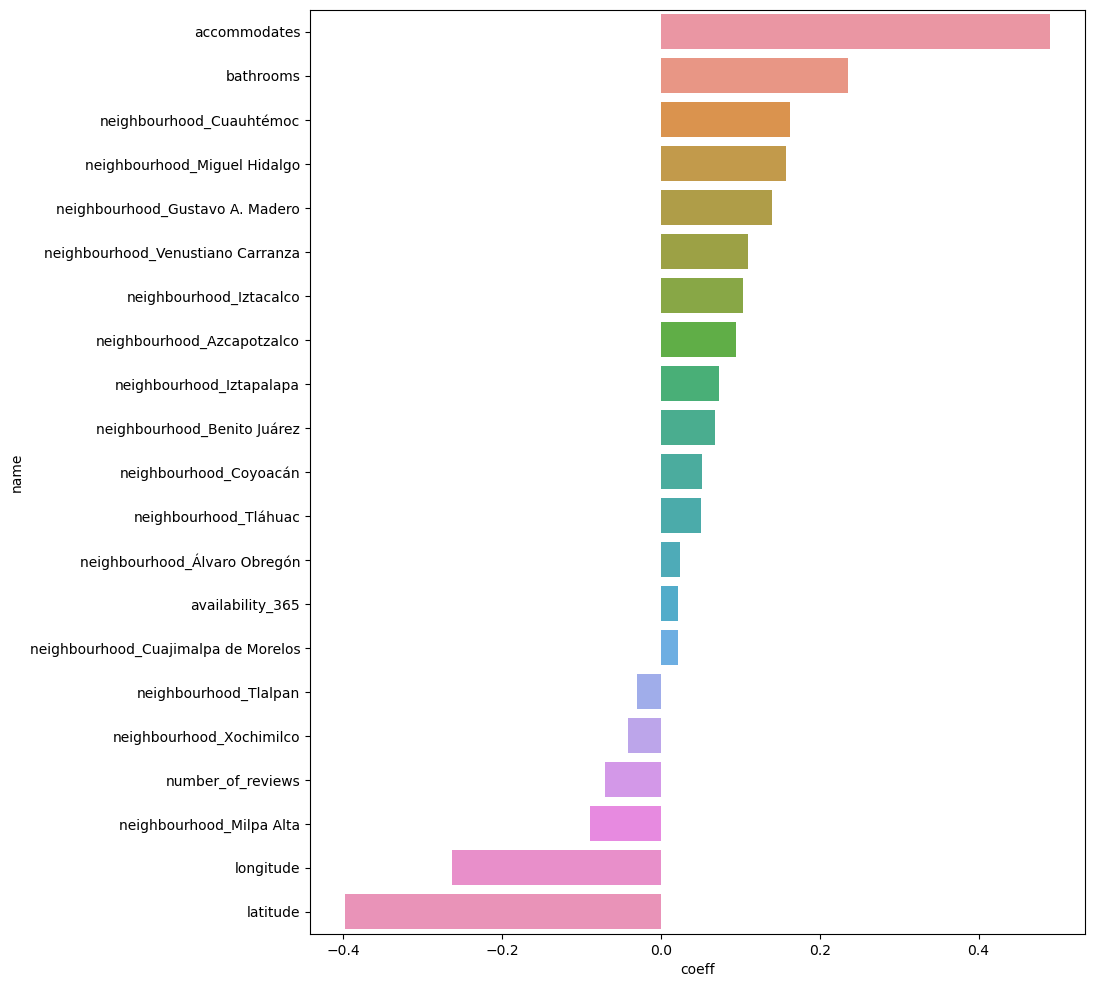

In [94]:
plt.figure(figsize=(10,12))
sns.barplot(y= fi_df['name'], x = fi_df['coeff'])